<a href="https://colab.research.google.com/github/RojaCM/NLP/blob/main/DL-dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MLP for the two circles problem

In [1]:
import numpy as np
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot

### Generate 2d classification dataset

In [2]:
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

In [3]:
X.shape, np.unique(y)

((1000, 2), array([0, 1]))

### split into train and test

In [4]:
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

### Define model

In [5]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### Fit model

In [6]:
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1)

Epoch 1/100
16/16 [==============================] - 1s 17ms/step - loss: 0.6965 - accuracy: 0.4940 - val_loss: 0.6959 - val_accuracy: 0.4980
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6960 - accuracy: 0.4880 - val_loss: 0.6957 - val_accuracy: 0.5080
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6956 - accuracy: 0.4920 - val_loss: 0.6956 - val_accuracy: 0.4980
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.4940 - val_loss: 0.6954 - val_accuracy: 0.4900
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6949 - accuracy: 0.4780 - val_loss: 0.6953 - val_accuracy: 0.4960
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.4980 - val_loss: 0.6952 - val_accuracy: 0.5020
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.5020 - val_loss: 0.6951 - val_accuracy: 0.5060
Epoch 8/100


### Evaluate the model

In [7]:
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.618, Test: 0.568


### Plot history

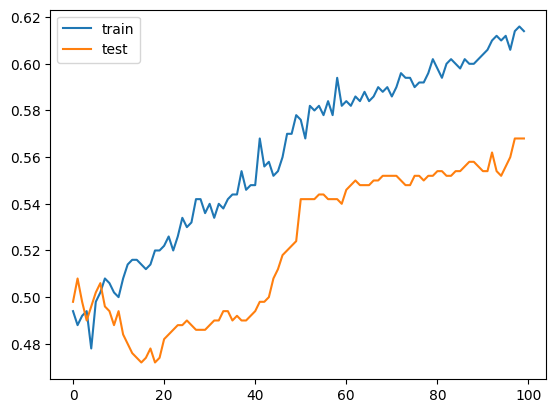

In [9]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()